# # **Statistcs in Python**
## One Way ANOVA and PostHoc tests in python

Written by: M.Danish Azeem\
Date: 22.12.2023\
Email: danishazeem365@gmail.com

In [2]:
# import librares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
kashti = sns.load_dataset('titanic')
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

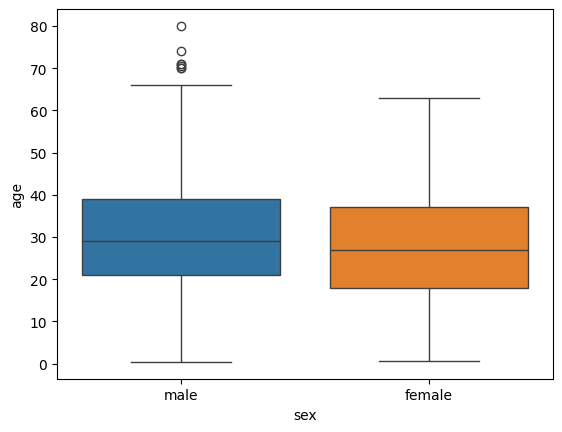

In [7]:
sns.boxplot(x='sex', y='age', hue='sex', data=kashti)   # coparison between 2 categorical variable for one continious

<Axes: xlabel='class', ylabel='age'>

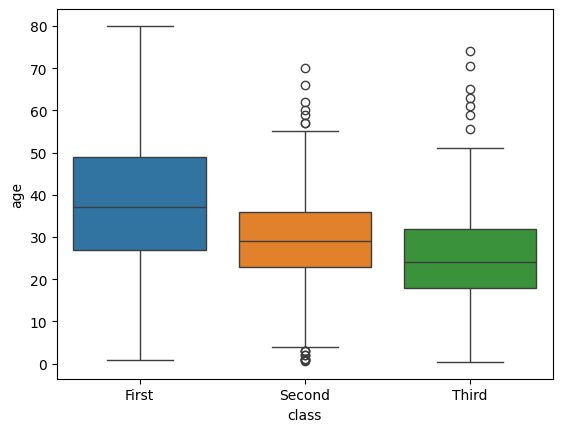

In [8]:
sns.boxplot(x='class', y='age', hue='class', data=kashti) #ANOVA

In [10]:
# example
phool = sns.load_dataset('iris')

phool.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
phool.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
85,6.0,3.4,4.5,1.6,versicolor
110,6.5,3.2,5.1,2.0,virginica
130,7.4,2.8,6.1,1.9,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
90,5.5,2.6,4.4,1.2,versicolor
132,6.4,2.8,5.6,2.2,virginica
131,7.9,3.8,6.4,2.0,virginica
21,5.1,3.7,1.5,0.4,setosa
23,5.1,3.3,1.7,0.5,setosa


In [12]:
phool.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
phool.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='sepal_length'>

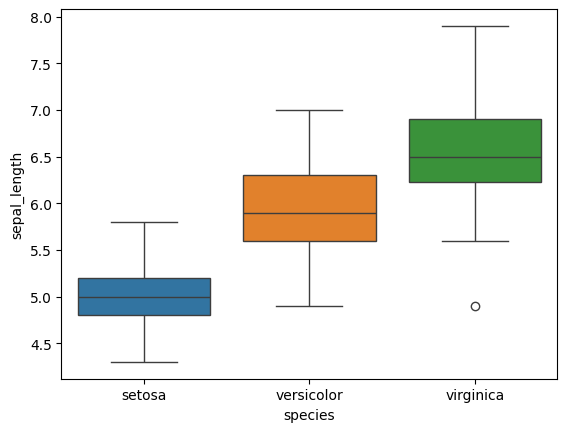

In [18]:
sns.boxplot(x='species', y='sepal_length', hue='species', data=phool)

In [19]:
# stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [23]:
# one way ANOVA

model = ols('sepal_length ~ species', data=phool).fit()
aov_table = sm.stats.anova_lm(model, type=2) # assignment
print(aov_table)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


In [24]:
# pairwise comparison
pair_t = model.t_test_pairwise('species', method='bonferroni')  # sidak
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
versicolor-setosa,0.930,0.102958,9.032819,8.770194e-16,0.726531,1.133469,2.631058e-15,True
virginica-setosa,1.582,0.102958,15.365506,2.214821e-32,1.378531,1.785469,6.644464e-32,True
virginica-versicolor,0.652,0.102958,6.332686,2.765638e-09,0.448531,0.855469,8.296915e-09,True


In [31]:
# tukey hsd test
# pip install pingouin
import pingouin as pg
# First calculate ANOVA Table
aov = pg.anova(data=phool, dv= 'sepal_length', between='species', detailed=True)
print(aov)



    Source         SS   DF         MS           F         p-unc       np2
0  species  63.212133    2  31.606067  119.264502  1.669669e-31  0.618706
1   Within  38.956200  147   0.265008         NaN           NaN       NaN


In [30]:
# tukey HSD
pt = pg.pairwise_tukey(data=phool, dv= 'sepal_length', between='species')
print(pt)


            A           B  mean(A)  mean(B)   diff        se          T  \
0      setosa  versicolor    5.006    5.936 -0.930  0.102958  -9.032819   
1      setosa   virginica    5.006    6.588 -1.582  0.102958 -15.365506   
2  versicolor   virginica    5.936    6.588 -0.652  0.102958  -6.332686   

        p-tukey    hedges  
0  2.420286e-14 -2.088053  
1  2.153833e-14 -3.053629  
2  8.287554e-09 -1.117195  
